# MC thesis studies. 

**Idea**: Keep this ruthlessly organized. Each section is targeted at a specific thesis plot/study. No more no less. Start with the simplest things first. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import uproot4
from lmfit import minimize, Parameters, fit_report
from scipy import integrate
from pathlib import Path

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
from rocks_utility import he6cres_db_query

# Path to local imports.
sys.path.append("/home/drew/He6CRES/he6-cres-spec-sims/")

# Local imports.
import he6_cres_spec_sims.spec_tools.spec_calc.spec_calc as sc
import he6_cres_spec_sims.experiment as exp
import he6_cres_spec_sims.spec_tools.beta_source.beta_spectrum as bs

# Local imports for plotting ratios and such. 
import analysis_functions.ratio_experiment as re
import analysis_functions.ratio_prediction as rp
import analysis_functions.plotting_methods as pm
import mc_functions.simple_mc as mc
import mc_functions.const_prop_vs_counts as cpc
import mc_functions.const_prop_vs_mon as cpm
import mc_functions.B_sensitivity as btest
import mc_functions.mon_drift_sensitivity as montest
import mc_functions.wall_effect as we
import mc_functions.energy_domain as ed

# Plot font size
plt.rcParams.update({'font.size': 20})

## MC1, Thesis Section: Ratio measurement sensitivity to \littleb

**Idea**: Used to give a simple deltab \sim Const/rootN. 

**Notes**: 

* The total number of monitor counts does matter for a given field. Look up what it is currently. This study could quote a statistical error with that number as well (C/rootN). 

**To Dos**: 

* Add in the residuals to the plots like we have in paper-01.

### MC1, step 0: Illustrate it's working.

[[Variables]]
    C:  0.59242315 +/- 0.00994801 (1.68%) (init = 1)
    b: -0.06073543 +/- 0.11252543 (185.27%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, b) = 0.179


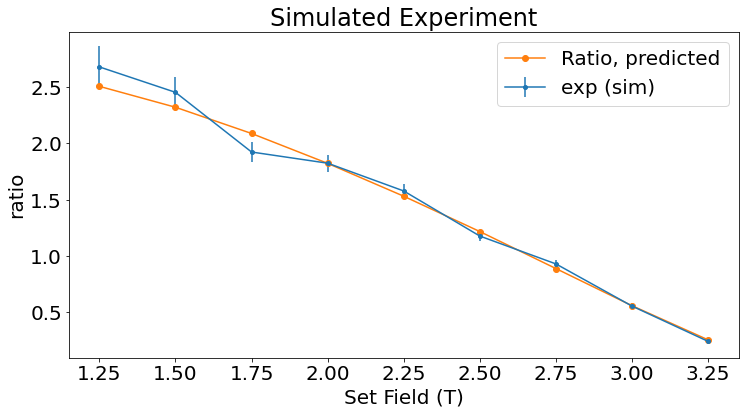

In [60]:
# Select set fields. 
set_fields = np.arange(1.25,3.5,.25)
# Freq BW.
freq_BW = np.array([19.0e9 ,  19.1e9])
# Tile freq_BW.
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

# C, relationship between he and ne monitor.
C_exp = np.random.uniform(.5,1.5)

# Number of counts: 
N = 10**4
# monitor rate tot: 
mon = 10**8
# Set little b.
b = 0

# Simulate simple experiment.
ratio_exp, spectra_ne_exp, spectra_he_exp = mc.simple_MC(set_fields, 
                                                         freq_BWs, 
                                                         C_exp, 
                                                         b, 
                                                         counts_per_isotope = N, 
                                                         monitor_rate = mon,
                                                         counts_pois = True, 
                                                         mon_pois = True)

ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)

# Conduct fit. 
my_pars = Parameters()
my_pars.add('C', value=1, min=0, max = 10, vary =True)
my_pars.add('b', value=.1, min=-10, max = 10, vary =True)

result = minimize(mc.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp, b))

# Fit report.
print(fit_report(result.params))

# Plot results.
fig0, ax0 = plt.subplots(figsize=(12,6))

C = result.params["C"].value

ratio_exp_cp = ratio_exp.copy()
ratio_exp_cp["Ratio"] = C*ratio_exp_cp["Ratio"]
ratio_exp_cp["sRatio"] = C*ratio_exp_cp["sRatio"]

pm.plot_experimental_ratio(ratio_exp_cp, ax0, label= f"exp (sim)")
pm.plot_predicted_ratio(ratio_pred, ax0)

# ax0.set_yscale("log")
ax0.set_ylabel('ratio')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Simulated Experiment")
ax0.legend()
plt.show()

### MC1, step 1: Dependence on counts_per_isotope

**Notes**:
* I'm using .75 - 3.25 here as that's our ultimate goal.
* I'm not poisson varying the monitor. 
* Building these into modules for ease. 

N = 10**3, trial = 0
N = 10**3, trial = 1
N = 10**3, trial = 2
N = 10**3, trial = 3
N = 10**3, trial = 4
N = 10**3, trial = 5
N = 10**3, trial = 6
N = 10**3, trial = 7
N = 10**3, trial = 8
N = 10**3, trial = 9
N = 10**3, trial = 10
N = 10**3, trial = 11
N = 10**3, trial = 12
N = 10**3, trial = 13
N = 10**3, trial = 14
N = 10**3, trial = 15
N = 10**3, trial = 16
N = 10**3, trial = 17
N = 10**3, trial = 18
N = 10**3, trial = 19
N = 10**3, trial = 20
N = 10**3, trial = 21
N = 10**3, trial = 22
N = 10**3, trial = 23
N = 10**3, trial = 24
N = 10**3, trial = 25
N = 10**3, trial = 26
N = 10**3, trial = 27
N = 10**3, trial = 28
N = 10**3, trial = 29
N = 10**3, trial = 30
N = 10**3, trial = 31
N = 10**3, trial = 32
N = 10**3, trial = 33
N = 10**3, trial = 34
N = 10**3, trial = 35
N = 10**3, trial = 36
N = 10**3, trial = 37
N = 10**3, trial = 38
N = 10**3, trial = 39
N = 10**3, trial = 40
N = 10**3, trial = 41
N = 10**3, trial = 42
N = 10**3, trial = 43
N = 10**3, trial = 44
N = 10**3, trial = 4

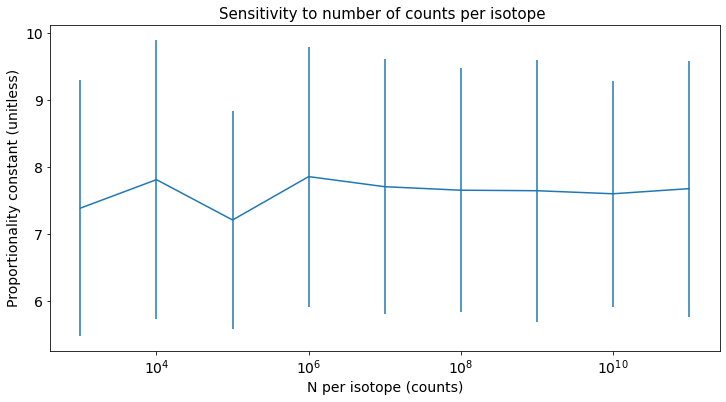

In [103]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)
# Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])

b_uncert = cpc.run_N_const_prop_test(set_fields, freq_BW, exp_max = 13, trial_max = 64 )
cpc.plot_N_const_prop_test(b_uncert)

### MC1, step 2: Dependence on monitor counts per field

**Notes**:
* I'm using .75 - 3.25 here as that's our ultimate goal.
* I'm not poisson varying the counts. 
* Building these into modules for ease. 

mon counts per field = 10**3, trial = 0
mon counts per field = 10**3, trial = 1
mon counts per field = 10**3, trial = 2
mon counts per field = 10**3, trial = 3
mon counts per field = 10**3, trial = 4
mon counts per field = 10**3, trial = 5
mon counts per field = 10**3, trial = 6
mon counts per field = 10**3, trial = 7
mon counts per field = 10**3, trial = 8
mon counts per field = 10**3, trial = 9
mon counts per field = 10**3, trial = 10
mon counts per field = 10**3, trial = 11
mon counts per field = 10**3, trial = 12
mon counts per field = 10**3, trial = 13
mon counts per field = 10**3, trial = 14
mon counts per field = 10**3, trial = 15
mon counts per field = 10**3, trial = 16
mon counts per field = 10**3, trial = 17
mon counts per field = 10**3, trial = 18
mon counts per field = 10**3, trial = 19
mon counts per field = 10**3, trial = 20
mon counts per field = 10**3, trial = 21
mon counts per field = 10**3, trial = 22
mon counts per field = 10**3, trial = 23
mon counts per field = 10*

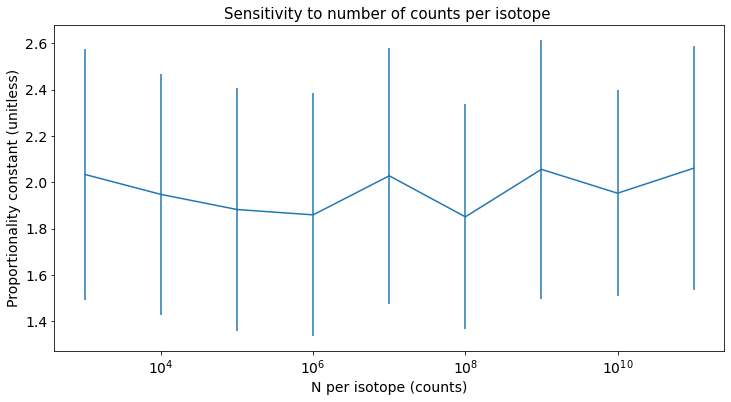

In [104]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)
# Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])

b_uncert = cpm.run_mon_const_prop_test(set_fields, freq_BW, exp_max = 12, trial_max = 64 )
cpm.plot_mon_const_prop_test(b_uncert)

## MC2, Thesis Section: \littleb sensitivity to B (mismatch and determination)

**Idea**: 

**Notes**: 

* So here we want to not have any statistical error, we want to just see what the effect on our littleb determination is as a function of a mismatch in fields

**To Dos**: 

* Start with B_sensitivity, try to make it work with either random set_fields or an offset. I think we're after a db/dB or something but not sure exactly... Do some exploring then talk with Alejandro. 

**Questions**:

* How do we actually get the desired thing we want here? a dB/

### MC2, step 0: Illustrate it's working.

[[Variables]]
    C:  0.91132994 +/- 9.7288e-04 (0.11%) (init = 1)
    b: -0.01213243 +/- 0.00552901 (45.57%) (init = 0.1)


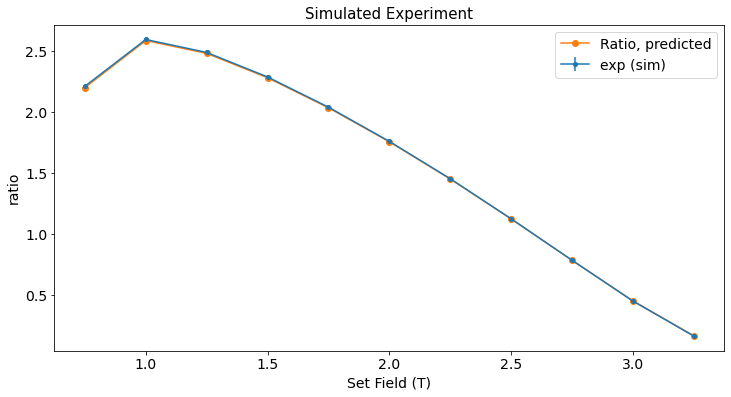

In [121]:
# Select set fields. 
set_fields_niave = np.arange(.75,3.5,.25)
seed = 1234
rng = np.random.default_rng(seed=seed)
# Add in some uncertainty in the field that's different for ne and he. 
field_error = 10**-4
field_offset = 10**-3
set_fields_ne = rng.normal(set_fields+set_fields*field_offset, set_fields*field_error)
set_fields_he = rng.normal(set_fields, set_fields*field_error)

# Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])
# Tile freq_BW.
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

# C, relationship between he and ne monitor.
C_exp = np.random.uniform(.5,1.5)

# Number of counts: 
N = 10**10
# monitor rate tot: 
mon = 10**10
# Set little b.
b = 0

# Simulate simple experiment.
ratio_exp, spectra_ne_exp, spectra_he_exp = btest.field_spread_MC(set_fields_ne,
                                                                  set_fields_he,
                                                                  set_fields_niave,
                                                                 freq_BWs, 
                                                                 C_exp, 
                                                                 b, 
                                                                 counts_per_isotope = N, 
                                                                 monitor_rate = mon,
                                                                 counts_pois = True, 
                                                                 mon_pois = True)

ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)

# Conduct fit. 
my_pars = Parameters()
my_pars.add('C', value=1, min=0, max = 10, vary =True)
my_pars.add('b', value=.1, min=-10, max = 10, vary =True)

result = minimize(mc.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp, b))

# Fit report.
print(fit_report(result.params))

# Plot results.
fig0, ax0 = plt.subplots(figsize=(12,6))

C = result.params["C"].value

ratio_exp_cp = ratio_exp.copy()
ratio_exp_cp["Ratio"] = C*ratio_exp_cp["Ratio"]
ratio_exp_cp["sRatio"] = C*ratio_exp_cp["sRatio"]

pm.plot_experimental_ratio(ratio_exp_cp, ax0, label= f"exp (sim)")
pm.plot_predicted_ratio(ratio_pred, ax0)

# ax0.set_yscale("log")
ax0.set_ylabel('ratio')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Simulated Experiment")
ax0.legend()
plt.show()

### MC2, step 1: Dependence on counts_per_isotope

In [148]:
field_errs = np.linspace(10**-5, 2*10**-2,10)
field_offsets = np.linspace(10**-5, 2*10**-2,10)

field_err_test, field_offset_test = btest.run_B_sensitivity_test(field_errs, field_offsets, trial_max = 20 )

display(field_err_test)
display(field_offset_test)

Field err: 1e-05, trial: 0
Field err: 1e-05, trial: 1
Field err: 1e-05, trial: 2
Field err: 1e-05, trial: 3
Field err: 1e-05, trial: 4
Field err: 1e-05, trial: 5
Field err: 1e-05, trial: 6
Field err: 1e-05, trial: 7
Field err: 1e-05, trial: 8
Field err: 1e-05, trial: 9
Field err: 1e-05, trial: 10
Field err: 1e-05, trial: 11
Field err: 1e-05, trial: 12
Field err: 1e-05, trial: 13
Field err: 1e-05, trial: 14
Field err: 1e-05, trial: 15
Field err: 1e-05, trial: 16
Field err: 1e-05, trial: 17
Field err: 1e-05, trial: 18
Field err: 1e-05, trial: 19
Field err: 0.0022311111111111112, trial: 0
Field err: 0.0022311111111111112, trial: 1
Field err: 0.0022311111111111112, trial: 2
Field err: 0.0022311111111111112, trial: 3
Field err: 0.0022311111111111112, trial: 4
Field err: 0.0022311111111111112, trial: 5
Field err: 0.0022311111111111112, trial: 6
Field err: 0.0022311111111111112, trial: 7
Field err: 0.0022311111111111112, trial: 8
Field err: 0.0022311111111111112, trial: 9
Field err: 0.0022311

KeyboardInterrupt: 

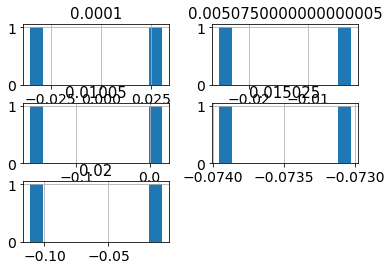

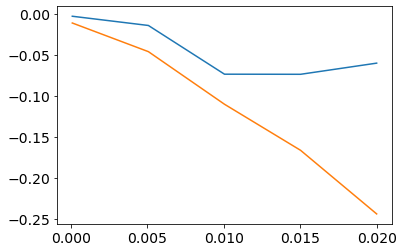

In [146]:
field_err_test.hist(bins = 10)
plt.show()

plt.plot(field_err_test.mean())
plt.plot(field_offset_test.mean())

## MC3, Thesis Section: Sensitivity to monitor instability

**Idea**: 

**Notes**: 

* So here we want to not have any statistical error, we want to just see what the effect on our littleb determination is as a function of a linear drift in the monitor stability. 
* A key point here is that if both the ne and he experiments drift together then there is no issue at all. So let's give both a drift metric seperately.  

**To Dos**: 

* Start  

**Questions**:

### MC3, step 0: Illustrate it's working.

In [ ]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)
seed = 1234
rng = np.random.default_rng(seed=seed)

# Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])
# Tile freq_BW.
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

# C, relationship between he and ne monitor.
C_exp = rng.uniform(.5,1.5)

# Number of counts: 
N = 10**10
# monitor rate tot: 
mon = 10**10
# Set little b.
b = 0
mon_drift_ne = -.1
mon_drift_he = .1

# Simulate simple experiment.
ratio_exp, spectra_ne_exp, spectra_he_exp = montest.mon_drift_MC(set_fields,
                                                                 freq_BWs, 
                                                                 C_exp, 
                                                                 b, 
                                                                 mon_drift_ne = mon_drift_ne,
                                                                 mon_drift_he = mon_drift_he,
                                                                 counts_per_isotope = N, 
                                                                 monitor_rate = mon,
                                                                 counts_pois = True, 
                                                                 mon_pois = False)

display(spectra_ne_exp)
display(spectra_he_exp)
spread_ne = (spectra_ne_exp["tot_monitor_rate"].iloc[-1] - spectra_ne_exp["tot_monitor_rate"].iloc[0]) / spectra_ne_exp["tot_monitor_rate"].iloc[0]
spread_he = (spectra_he_exp["tot_monitor_rate"].iloc[-1] - spectra_he_exp["tot_monitor_rate"].iloc[0]) / spectra_he_exp["tot_monitor_rate"].iloc[0]
print( spread_ne, spread_he)

In [ ]:
ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)

# Conduct fit. 
my_pars = Parameters()
my_pars.add('C', value=1, min=0, max = 10, vary =True)
my_pars.add('b', value=.1, min=-10, max = 10, vary =True)

result = minimize(mc.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp, b))

# Fit report.
print(fit_report(result.params))

# Plot results.
fig0, ax0 = plt.subplots(figsize=(12,6))

C = result.params["C"].value

ratio_exp_cp = ratio_exp.copy()
ratio_exp_cp["Ratio"] = C*ratio_exp_cp["Ratio"]
ratio_exp_cp["sRatio"] = C*ratio_exp_cp["sRatio"]

pm.plot_experimental_ratio(ratio_exp_cp, ax0, label= f"exp (sim)")
pm.plot_predicted_ratio(ratio_pred, ax0)

# ax0.set_yscale("log")
ax0.set_ylabel('ratio')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Simulated Experiment")
ax0.legend()
plt.show()

### MC3, step 1: Run the full test.

In [23]:
mon_drifts = 10**np.arange(-5,0,1, dtype=float)
print(mon_drifts)
mon_test_df = montest.run_mon_sensitivity_test( mon_drifts, trial_max = 2)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
Monitor drift: 1e-05, trial: 0
Monitor drift: 1e-05, trial: 1
Monitor drift: 0.0001, trial: 0
Monitor drift: 0.0001, trial: 1
Monitor drift: 0.001, trial: 0
Monitor drift: 0.001, trial: 1
Monitor drift: 0.01, trial: 0
Monitor drift: 0.01, trial: 1
Monitor drift: 0.1, trial: 0
Monitor drift: 0.1, trial: 1


In [24]:
mon_test_df

,0.00001,0.00010,0.00100,0.01000,0.10000
0,0.000028,0.000057,-0.001137,-0.011161,-0.104341
1,0.000036,-0.000005,-0.001150,-0.011128,-0.104459


## MC4, Thesis Section: Wall effect.

**Idea**: 

*  

**Notes**: 

* Start here, build what you have in the other nb into here (into mudules you can use for MC5). 
* Illustrate how chunking things up here reduces the size of the systematics/corrections?

**To Dos**: 

*  

**Questions**:

### MC4, step 0: Illustrate it's working.

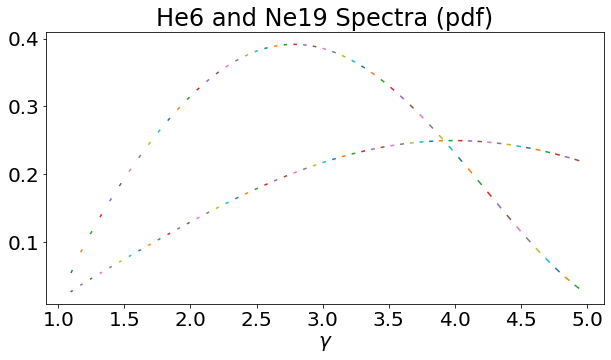

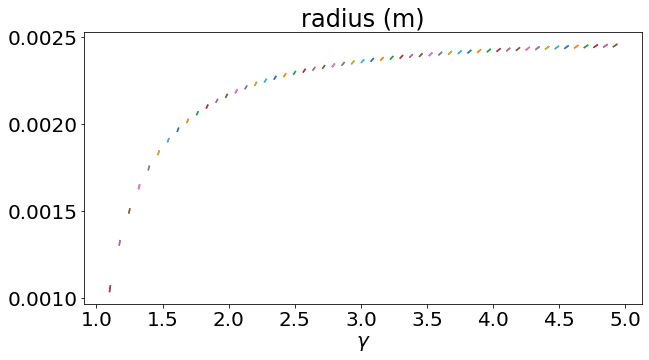

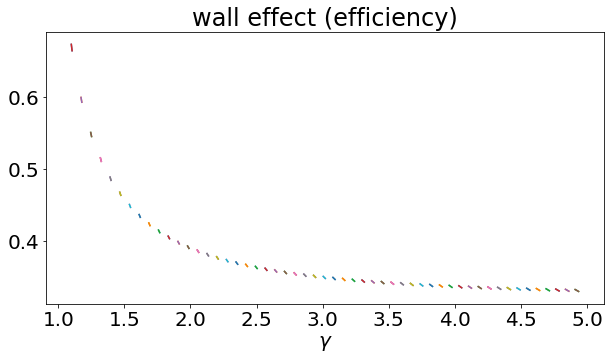

Text(0.5, 1.0, '$(R_{wall} / R_0) - 1 $ ')

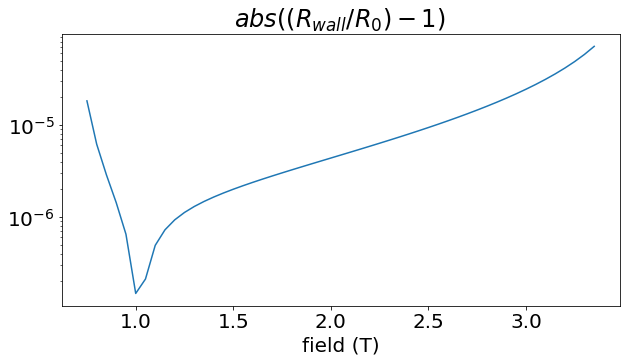

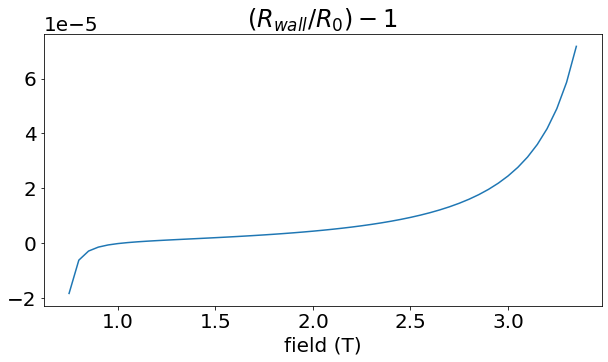

In [30]:
# Select set fields. 
set_fields = np.arange(.75,3.4,.05)

# Freq BW.
freq_BW = np.array([19.0e9 ,  19.1e9])
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

ratio_wall = we.AUC_expectation_we(set_fields, freq_BWs, b = 0, plot = True, wall_effect = True)  

ratio_0 = we.AUC_expectation_we(set_fields, freq_BWs, b = 0, plot = False, wall_effect = False)  

wall_effect = (ratio_wall/ratio_0 - 1)["Ratio"]

f0, ax0 = plt.subplots(1, figsize=(10,5))
wall_effect.abs().plot(ax = ax0)

ax0.set_yscale("log")
ax0.set_xlabel(r"field (T)")
ax0.set_title(r"$abs((R_{wall} / R_0) - 1 )$ ")

f1, ax1 = plt.subplots(1, figsize=(10,5))
wall_effect.plot(ax = ax1)

ax1.set_yscale("linear")
ax1.set_xlabel(r"field (T)")
ax1.set_title(r"$(R_{wall} / R_0) - 1 $ ")



## MC5, Thesis Section: An alternate way to present the data

**Idea**: 

* We want to illustrate that we can measure the efficiency with one isotope and then use that to plot the rate as a function of field for the other isotope. 

**Notes**: 

*   

**To Dos**: 

* When I calculate the stderr of the ratio I should include the error from the beta monitor. This is crucial. 


**Questions**:

* Is the different objective function actually accomplishing something different or not?
    * Yes, they are the same. Which makes sense because the normalization C gives the ratio in units of AUC_ne/AUC_he. Doh. Took me the long way around to figure it out but actually much nicer to present this way. Ok. Rehashing this to make it cleaner. 


### MC5, step 0: Illustrate it's working.
* This isn't working and I don't know why exactly... OHHHHHH. Wait no I'm not sure. Thought I dealt with the efficiencies wrong but now I don't think so. Oh well. 

#### Step 0: Simulate the counts.

#### Step 1: Validate that the wall effect is making a difference.

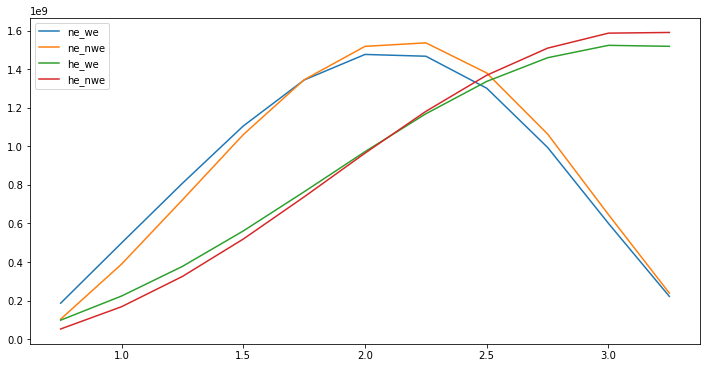

In [75]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)

# Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

C_exp = .75
b=0

spectra_ne_nwe, spectra_he_nwe = we.we_simple_MC(set_fields, 
              freq_BWs, 
              C_exp, 
              b, 
              counts_per_isotope = 10**10, 
              monitor_rate = 10**12,                                  
              counts_pois = True,                           
              mon_pois = True,
              wall_effect = False)

spectra_ne_we, spectra_he_we = we.we_simple_MC(set_fields, 
              freq_BWs, 
              C_exp, 
              b, 
              counts_per_isotope = 10**10, 
              monitor_rate = 10**12,                                  
              counts_pois = True,                           
              mon_pois = True,
              wall_effect = True)

# Plot results.
fig0, ax0 = plt.subplots(figsize=(12,6))

plt.plot(spectra_ne_we.index, spectra_ne_we.event_count, label = "ne_we")
plt.plot(spectra_ne_nwe.index, spectra_ne_nwe.event_count, label = "ne_nwe")

plt.plot(spectra_he_we.index, spectra_he_we.event_count, label = "he_we")
plt.plot(spectra_he_nwe.index, spectra_he_nwe.event_count, label = "he_nwe")
ax0.legend()

#### Step 2: Now calculate the efficiency.

* Key here is that the experimental ratio times the He6 spectrum should give you something proportional to the SM ne19 spectrum

In [81]:
# Build the experimental ratio.
ratio_exp = re.build_ratio_altnorm(spectra_ne_we, spectra_he_we)

display(ratio_exp)

,Ne19,He6,Ratio,sRatio
set_field,,,,
0.75,0.000248,0.000098,2.530932,0.000316
1.00,0.000664,0.000223,2.978696,0.000240
1.25,0.001077,0.000377,2.858319,0.000178
1.50,0.001473,0.000561,2.628256,0.000136
1.75,0.001792,0.000764,2.345528,0.000106
2.00,0.001968,0.000972,2.024963,0.000084
2.25,0.001956,0.001168,1.673942,0.000066
2.50,0.001735,0.001336,1.298083,0.000051
2.75,0.001325,0.001459,0.908160,0.000037


In [77]:
# Conduct fit. 
my_pars = Parameters()
my_pars.add('D', value=1, min=-100, max = 100, vary =True)
my_pars.add('b', value=0, min=-10, max = 10, vary =False)
print(my_pars)

result = minimize(we.objfunc_chisq_ne, my_pars, args = (freq_BWs, set_fields, ratio_exp))

# Fit report.
print(fit_report(result.params))

Parameters([('D', <Parameter 'D', value=1, bounds=[-100:100]>), ('b', <Parameter 'b', value=0 (fixed), bounds=[-10:10]>)])
[[Variables]]
    D:  0.86787886 +/- 5.2752e-04 (0.06%) (init = 1)
    b:  0 (fixed)


In [82]:
# ## old obj func. Are they the same??
# def objfunc_chisq(my_pars, freq_BWs, set_fields, ratio_exp): 

#     C =my_pars["C"].value
#     b =my_pars["b"].value

#     ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)
#     chisq_gauss = (ratio_pred["Ratio"] - C*ratio_exp["Ratio"])/ (C*ratio_exp["sRatio"])

#     return chisq_gauss

# Conduct fit. 
my_pars = Parameters()
my_pars.add('C', value=1, min=-100, max = 100, vary =True)
my_pars.add('b', value=0, min=-10, max = 10, vary =False)
print(my_pars)

result = minimize(we.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp))

# Fit report.
print(fit_report(result.params))

Parameters([('C', <Parameter 'C', value=1, bounds=[-100:100]>), ('b', <Parameter 'b', value=0 (fixed), bounds=[-10:10]>)])
[[Variables]]
    C:  0.86787886 +/- 5.2752e-04 (0.06%) (init = 1)
    b:  0 (fixed)


#### Step 2: Plot it. 
* First build the corrected spectrum. 

In [83]:
C = result.params["C"].value
b = result.params["b"].value

# Get the SM prediction.
ratio_pred = we.AUC_expectation_we(set_fields, freq_BWs, b = b, plot = False, wall_effect = False)

ratio_corr = ratio_exp.copy()
ratio_corr["Ne19_corr"] = C*ratio_pred["He6"]*ratio_exp["Ratio"]
ratio_corr["sNe19_corr"] = C*ratio_pred["He6"]*ratio_exp["sRatio"]

# ratio_corr_cp = ratio_exp.copy()
# ratio_corr_cp["Ne19_corr"] = ratio_exp["Ne19_corr"]
# ratio_corr_cp["sNe19_corr"] = D*ratio_exp["sNe19_corr"]

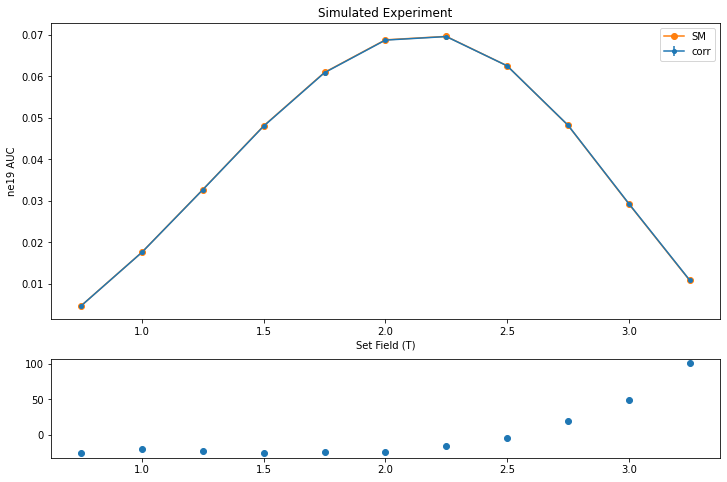

,Ne19,He6,Ratio,sRatio,Ne19_corr,sNe19_corr
set_field,,,,,,
0.75,0.000248,0.000098,2.530932,0.000316,0.004662,5.819458e-07
1.00,0.000664,0.000223,2.978696,0.000240,0.017579,1.416204e-06
1.25,0.001077,0.000377,2.858319,0.000178,0.032664,2.037795e-06
1.50,0.001473,0.000561,2.628256,0.000136,0.047994,2.488641e-06
1.75,0.001792,0.000764,2.345528,0.000106,0.060888,2.759170e-06
2.00,0.001968,0.000972,2.024963,0.000084,0.068742,2.839438e-06
2.25,0.001956,0.001168,1.673942,0.000066,0.069596,2.728924e-06
2.50,0.001735,0.001336,1.298083,0.000051,0.062539,2.435757e-06
2.75,0.001325,0.001459,0.908160,0.000037,0.048242,1.984051e-06


In [86]:
# Plot results.
f, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},figsize=(12,8))

ax0.errorbar(
    ratio_corr["Ne19_corr"].index,
    ratio_corr["Ne19_corr"],
    yerr=ratio_corr["sNe19_corr"],
    label="corr",
    marker="o",
    ms=4,
)

ax0.plot(ratio_pred["Ne19"].index,ratio_pred["Ne19"], label="SM", marker="o", ms=6)

ax0.set_ylabel('ne19 AUC')
ax0.set_xlabel('Set Field (T)')
ax0.set_title(f"Simulated Experiment")
ax0.legend()

ax1.plot(ratio_corr["Ne19_corr"].index, (ratio_corr["Ne19_corr"] - ratio_pred["Ne19"])/ratio_corr["sNe19_corr"] , 
         label= f"residual", 
         marker="o", 
         ls = "None",
         ms=6)

plt.show()
# print(ratio_corr_cp, ratio_pred["Ne19"].index)

display(ratio_corr)

#### Now take the above and port it to the energy domain. 

* How to do this? We want uneven energy bins.
* we'll want something that looks like this: https://stackoverflow.com/questions/11774822/matplotlib-histogram-with-errorbars, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* Ok so what we want is for the width x height to be equal to our AUC that we get above. And then we do need to scale the error as well because that's an error in the area.
* Then it would be nice for a plot like this to also contain the pdf of the beta spectrum. That would be powerful. 
* Then, the last step would be to get things working smoothly for smaller frequency bins, to show how that works in the energy domain. Would look cool I think and would be a nice way to present some real data. This is new but it's worth doing right. Get it working today and then rage on writing from there. 
* I need to put together some slides of the above findings and present to the group before I go into a lot of effort to write all this up in my thesis. Good to get that feedback first I think. 

#### Step 3: Plot it in gamma domain. 

TODO: 
* Build this into it's own module at some point. 
* Also add in residuals below. Wait on this until you're building plots for the thesis. 

In [87]:
gamma_acceptances, gamma_widths, gamma_heights, gamma_height_errs, SM_heights = ed.freq_to_energy_domain(
    set_fields, freq_BWs, ratio_corr, ratio_pred)

In [88]:
isotopes = {
"Ne19": {
    "W0": 5.339539,
    "Z": 10,
    "A": 19,
    "beta_type": "Mixed",
    "decay_type":"+" ,
    "mixing_ratio": 2.22,
    "R": 2.9,
    "bAc": 0,
    "dAc": 0,
    "Lambda": 0,
    "b": -.7204*b
},
"He6": {
    "W0": 7.859525,
    "Z": 2,
    "A": 6,
    "beta_type": "Gamow-Teller",
    "decay_type":"-" ,
    "mixing_ratio": None,
    "R": 1.6,
    "bAc": 0,
    "dAc": 0,
    "Lambda": 0,
    "b": b
}}
# Feed the info dict to the BetaSpectrum class. 
bspec = bs.BetaSpectrum(isotopes["Ne19"])

Ws = np.linspace(1.001, isotopes["Ne19"]["W0"]-.001, 300)
pdf = bspec.dNdE(Ws)

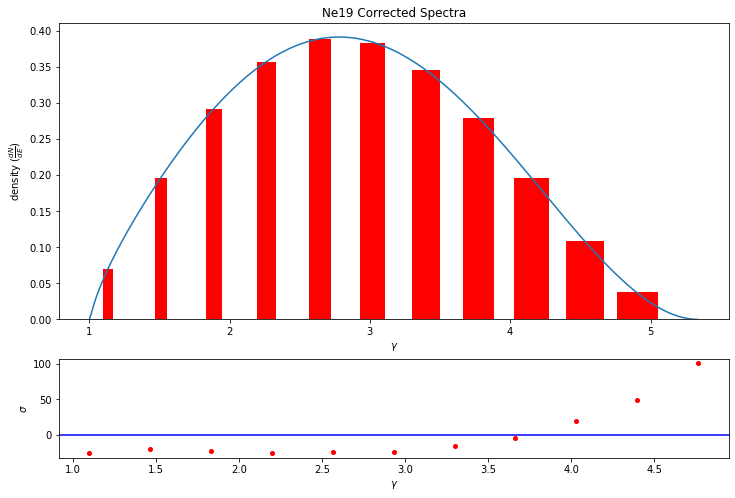

In [89]:

# fig0, ax0 = plt.subplots(figsize=(12,6))
f, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},figsize=(12,8))


ax0.plot(Ws, pdf, label = "pdf")
ed.energy_domain_plot(ax0,ax1, gamma_acceptances, gamma_widths, gamma_heights, gamma_height_errs, SM_heights, ratio_corr, ratio_pred)        
    
plt.show()


## MC6, Thesis Section: Finer frequency bins. 

**Idea**: 

* Want to do something similar to the above but with finer frequency bins. Resulting in a plot like the above but with each chunk further chunked (lol). 

**Notes**: 

*   

**To Dos**: 

* First step is to clean up the above.  

**Questions**:
* One thing I'm not sure of is how to deal with the monitor. I guess I shouldn't reduce the monitor rate for the different chunks because it is something that is independent of the cres rate. 

### MC6, step 0: Start sloppy-ish, work towards something nice. 

In [92]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)

# Full Freq BW.
freq_BW = np.array([18.0e9 ,  19.1e9])

C_exp = .75
b=0

# Set the frequency chunk size: 
freq_chunk = 100e6

N_per_isotope = 10**12
mon_rate = 10**12

freq_BW_tot = freq_BW[1] - freq_BW[0]
n_chunks = int(np.ceil((freq_BW_tot / freq_chunk)))
print(n_chunks)

11



Counts in chunk: 90909090909
[[Variables]]
    C:  0.82660826 +/- 6.5875e-06 (0.00%) (init = 1)
    b:  4.9071e-05 +/- 3.7054e-05 (75.51%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.83503279 +/- 5.0365e-06 (0.00%) (init = 1)
    b:  7.0514e-05 +/- 2.8158e-05 (39.93%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.84353395 +/- 6.8257e-06 (0.00%) (init = 1)
    b:  7.3130e-05 +/- 3.7744e-05 (51.61%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.85208813 +/- 7.9106e-06 (0.00%) (init = 1)
    b:  7.8911e-05 +/- 4.3231e-05 (54.78%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.86068792 +/- 5.4029e-06 (0.00%) (init = 1)
    b:  1.3180e-04 +/- 2.9223e-05 (22.17%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.86932372 +/- 4.2907e-06 (0.00%) (init = 1)
    b:  1.5466e-04 +/- 2.2979e-05 (14.86%) (init = 0)

Counts in chunk: 90909090909
[[Variables]]
    C:  0.87797877 +/- 5.1224e-06 (0.00%) (init = 

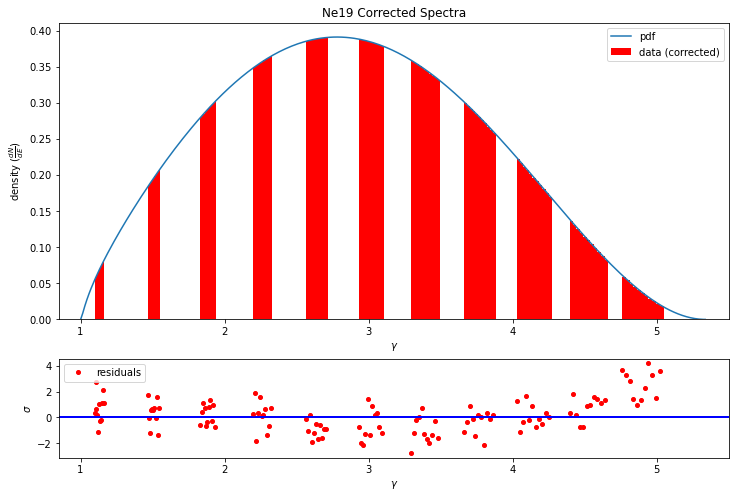

In [93]:
%matplotlib inline 
f, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},figsize=(12,8))

b_fits = []
b_errs = []

for i,chunk in enumerate(range(n_chunks)):
    freq_BW_chunk = np.clip(np.array([freq_BW[0]+ freq_chunk*chunk, freq_BW[0]+ freq_chunk*(chunk+1)]), 0,freq_BW.max())
    freq_BW_chunk_tot = freq_BW_chunk[1] - freq_BW_chunk[0]
    N_per_isotope_in_chunk = int(N_per_isotope* freq_BW_chunk_tot/ freq_BW_tot)
    mon_rate_per_isotope_in_chunk = mon_rate
    print(f"\nCounts in chunk: {N_per_isotope_in_chunk}")
    freq_BWs = np.tile(freq_BW_chunk, (len(set_fields), 1))
    # print(freq_BWs)
    
    spectra_ne_we, spectra_he_we = we.we_simple_MC(set_fields, 
              freq_BWs, 
              C_exp, 
              b, 
              counts_per_isotope = N_per_isotope_in_chunk, 
              monitor_rate = mon_rate_per_isotope_in_chunk,                                  
              counts_pois = True,                           
              mon_pois = True,
              wall_effect = True)
    
    ratio_exp = re.build_ratio_altnorm(spectra_ne_we, spectra_he_we)
    # Conduct fit. 
    my_pars = Parameters()
    my_pars.add('C', value=1, min=-100, max = 100, vary =True)
    my_pars.add('b', value=0, min=-10, max = 10, vary =True)

    result = minimize(we.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp))

    # Fit report.
    print(fit_report(result.params))
    
    C = result.params["C"].value
    b = result.params["b"].value
    b_normed
    # Get the SM prediction.
    ratio_pred = we.AUC_expectation_we(set_fields, freq_BWs, b = b, plot = False, wall_effect = False)

    ratio_corr = ratio_exp.copy()
    ratio_corr["Ne19_corr"] = C*ratio_pred["He6"]*ratio_exp["Ratio"]
    ratio_corr["sNe19_corr"] = C*ratio_pred["He6"]*ratio_exp["sRatio"]

    gamma_acceptances, gamma_widths, gamma_heights, gamma_height_errs, SM_heights = ed.freq_to_energy_domain(
    set_fields, freq_BWs, ratio_corr, ratio_pred)
    
    label_bool = i==0
    ed.energy_domain_plot(ax0,ax1, gamma_acceptances, gamma_widths, 
                          gamma_heights, gamma_height_errs, SM_heights, 
                          ratio_corr, ratio_pred, label = label_bool) 
    
    # Now add to the list of b_normed
    
    b_fits.append(result.params["b"].value)
    b_errs.append(result.params["b"].stderr)

ax0.plot(Ws, pdf, label = "pdf")


ax0.legend()
ax1.legend()

ax0.set_xlim(.85,5.5); ax1.set_xlim(.85,5.5)
plt.show()

##### Histogram the b fits. 

* Take-away: We see that the wall effect can be reduced to a 10**-4 effect with 50 MHz chunks. 

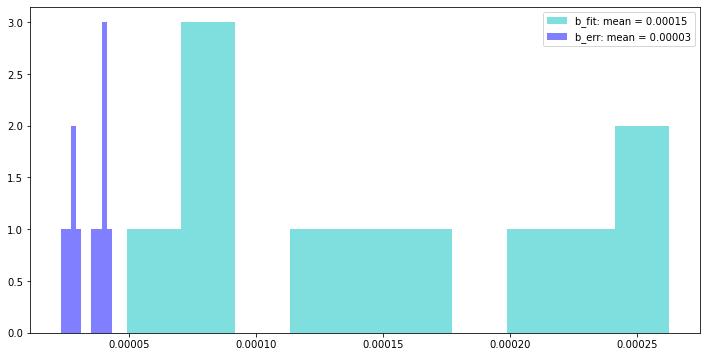

In [94]:
f0, ax0 = plt.subplots(figsize=(12,6))
b_fits = np.array(b_fits)
b_errs = np.array(b_errs)
ax0.hist(b_fits, label = f"b_fit: mean = {b_fits.mean():.5f}", alpha = .5, color = "c")
ax0.hist(b_errs, label = f"b_err: mean = {b_errs.mean():.5f}", alpha = .5, color = "b")
ax0.legend()

plt.show()

# OLD (DELETE ONCE DONE WITH THIS STUFF)

In [13]:
def we_simple_MC(set_fields, 
              freq_BWs, 
              C_exp, 
              b, 
              counts_per_isotope = 10**4, 
              monitor_rate = 10**5,                                  
              counts_pois = True,                           
              mon_pois = True,
              wall_effect = True): 
    
    # Simulate data.
    ratio_pred = we.AUC_expectation_we(set_fields, freq_BWs, b = b, plot = False, wall_effect = wall_effect)

    # Simulate data that provides the "spectra" df for both ne and he.
    spectra_ne_exp = pd.DataFrame()
    spectra_he_exp = pd.DataFrame()

    spectra_ne_exp["set_field"] = ratio_pred.index
    spectra_he_exp["set_field"] = ratio_pred.index

    spectra_ne_exp.index = ratio_pred.index
    spectra_he_exp.index = ratio_pred.index

    spectra_ne_exp["event_count"] = ratio_pred["Ne19"]*counts_per_isotope/ratio_pred["Ne19"].sum()
    spectra_he_exp["event_count"] = ratio_pred["He6"]*counts_per_isotope/ratio_pred["He6"].sum()

    spectra_ne_exp["tot_monitor_rate"] = C_exp*monitor_rate
    spectra_he_exp["tot_monitor_rate"] = monitor_rate
    
    if mon_pois:
        # Apply a poisson statistic with the given mean for the event counts. 
        spectra_ne_exp["tot_monitor_rate"] = np.random.poisson(spectra_ne_exp["tot_monitor_rate"])
        spectra_he_exp["tot_monitor_rate"] = np.random.poisson(spectra_he_exp["tot_monitor_rate"])
    
    if counts_pois:
        # Apply a poisson statistic with the given mean for the event counts.  
        spectra_ne_exp["event_count"] = np.random.poisson(spectra_ne_exp["event_count"])
        spectra_he_exp["event_count"] = np.random.poisson(spectra_he_exp["event_count"])

    # ratio_exp = re.build_ratio_altnorm(spectra_ne_exp, spectra_he_exp)
    
    return spectra_ne_exp, spectra_he_exp

In [73]:
# Select set fields. 
set_fields = np.arange(.75,3.5,.25)
# Freq BW.
freq_BW = np.array([19.0e9 ,  19.1e9])
# Tile freq_BW.
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

# C, relationship between he and ne monitor.
C_exp = np.random.uniform(.25,1.75)

# monitor rate tot: 
mon = 10**10
# Set little b.
b = 0

b_uncert = {}
for exp in np.linspace(3,12):
    # Number of counts: 
    N = 10**exp
    
    b_uncert[exp] = []
    
    for trial in range(20): 
        print(f"N = 10**{exp}, trial = {trial}")
        
        # Simulate simple experiment. Don't poisson vary monitor.
        ratio_exp, spectra_ne_exp, spectra_he_exp = mc.simple_MC(set_fields, 
                                                                 freq_BWs, 
                                                                 C_exp, 
                                                                 b, 
                                                                 counts_per_isotope = N, 
                                                                 monitor_rate = mon,
                                                                 counts_pois = True, 
                                                                 mon_pois = False)

        ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)

        # Conduct fit. 
        my_pars = Parameters()
        my_pars.add('C', value=1, min=0, max = 10, vary =True)
        my_pars.add('b', value=.001, min=-10, max = 10, vary =True)

        result = minimize(mc.objfunc_chisq, my_pars, args = (freq_BWs, set_fields, ratio_exp, b))
        
        b_uncert[exp].append(result.params["b"].stderr)

b_uncert = pd.DataFrame(b_uncert)

N = 10**3, trial = 0
N = 10**3, trial = 1
N = 10**3, trial = 2
N = 10**3, trial = 3
N = 10**3, trial = 4
N = 10**3, trial = 5
N = 10**3, trial = 6
N = 10**3, trial = 7
N = 10**3, trial = 8
N = 10**3, trial = 9
N = 10**3, trial = 10
N = 10**3, trial = 11
N = 10**3, trial = 12
N = 10**3, trial = 13
N = 10**3, trial = 14
N = 10**3, trial = 15
N = 10**3, trial = 16
N = 10**3, trial = 17
N = 10**3, trial = 18
N = 10**3, trial = 19
N = 10**4, trial = 0
N = 10**4, trial = 1
N = 10**4, trial = 2
N = 10**4, trial = 3
N = 10**4, trial = 4
N = 10**4, trial = 5
N = 10**4, trial = 6
N = 10**4, trial = 7
N = 10**4, trial = 8
N = 10**4, trial = 9
N = 10**4, trial = 10
N = 10**4, trial = 11
N = 10**4, trial = 12
N = 10**4, trial = 13
N = 10**4, trial = 14
N = 10**4, trial = 15
N = 10**4, trial = 16
N = 10**4, trial = 17
N = 10**4, trial = 18
N = 10**4, trial = 19
N = 10**5, trial = 0
N = 10**5, trial = 1
N = 10**5, trial = 2
N = 10**5, trial = 3
N = 10**5, trial = 4
N = 10**5, trial = 5
N = 10**5, tri

          3         4         5         6         7         8         9   \
0   0.123282  0.095392  0.025262  0.005739  0.002900  0.000610  0.000269   
1   0.308715  0.047387  0.027104  0.005869  0.001725  0.000740  0.000356   
2   0.227528  0.067832  0.017769  0.007746  0.003266  0.000787  0.000258   
3   0.254086  0.054840  0.023621  0.009934  0.002694  0.000904  0.000274   
4   0.190093  0.042385  0.023312  0.004753  0.002529  0.000686  0.000249   
5   0.218580  0.061290  0.018763  0.007846  0.002562  0.000555  0.000152   
6   0.348392  0.095815  0.026292  0.005587  0.002047  0.000955  0.000186   
7   0.229896  0.073416  0.024777  0.009044  0.002790  0.000566  0.000294   
8   0.196279  0.076745  0.009003  0.005995  0.001826  0.000579  0.000224   
9   0.167900  0.072855  0.017263  0.010531  0.002561  0.000878  0.000104   
10  0.201541  0.056542  0.029468  0.009599  0.001966  0.000835  0.000231   
11  0.173684  0.097489  0.026816  0.006909  0.002394  0.000837  0.000231   
12  0.191100

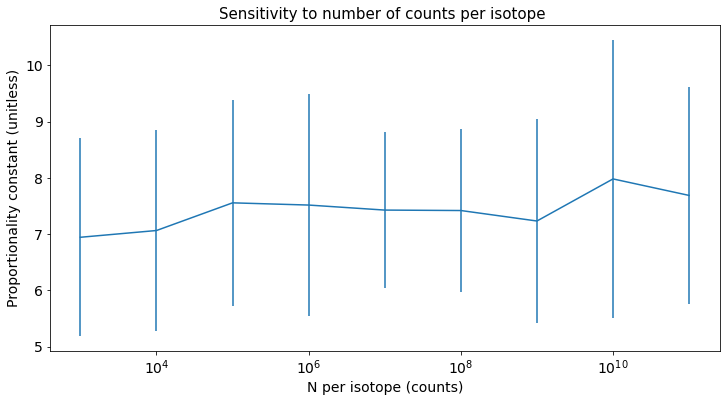

In [87]:
%matplotlib inline

# Plot results.
fig0, ax0 = plt.subplots(figsize=(12,6))
print(b_uncert)
N = 10**b_uncert.mean().index.values
print(b_uncert.mean().values)
Const = b_uncert.mean().values * np.sqrt(N)
Const_err = b_uncert.std().values * np.sqrt(N)
plt.errorbar(N, Const, yerr =  Const_err)

ax0.set_xscale("log")
ax0.set_ylabel('Proportionality constant (unitless)')
ax0.set_xlabel('N per isotope (counts)')
ax0.set_title(f"Sensitivity to number of counts per isotope ")


# ------ Set Thesis Plot Parameters -----------

params = {
    "axes.titlesize": 15,
    "legend.fontsize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
}
plt.rcParams.update(params)
figsize = (10,6)

# Save the figure.
figures_path = Path("/home/drew/He6CRES/rocks_analysis_notebooks/saved_plots")
plt.savefig(figures_path / Path(f"Const_prop.png"), bbox_inches="tight", dpi=300)
plt.show()




In [29]:
# Select set fields. 
set_fields = np.arange(1.25,3.5,.25)

# Freq BW.
freq_BW = np.array([17.9e9 ,  19.1e9])
freq_BWs = np.tile(freq_BW, (len(set_fields), 1))

C_exp = np.random.uniform(.25,.7)
print(C_exp)

# Simulate real data.
b = .2
ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)

ratio_pred["Ratio"] 
# display(ratio_pred)

# Simulate data that provides the "spectra" df for both ne and he. You got this. 
# This way you can test out how everything works from the beginning. 

counts_per_isotope = 10**4
monitor_rate = 10**5

spectra_ne_exp = pd.DataFrame()
spectra_he_exp = pd.DataFrame()

spectra_ne_exp["set_field"] = ratio_pred.index
spectra_he_exp["set_field"] = ratio_pred.index

spectra_ne_exp.index = ratio_pred.index
spectra_he_exp.index = ratio_pred.index

spectra_ne_exp["event_count"] = ratio_pred["Ne19"]*counts_per_isotope/ratio_pred["Ne19"].sum()
spectra_he_exp["event_count"] = ratio_pred["He6"]*counts_per_isotope/ratio_pred["He6"].sum()

spectra_ne_exp["tot_monitor_rate"] = C_exp*monitor_rate
spectra_he_exp["tot_monitor_rate"] = monitor_rate

# Apply a poisson statistic with the given mean.  
spectra_ne_exp["event_count"] = np.random.poisson(spectra_ne_exp["event_count"])
spectra_he_exp["event_count"] = np.random.poisson(spectra_he_exp["event_count"])

display(spectra_ne_exp)
display(spectra_he_exp)

ratio_exp = re.build_ratio_altnorm(spectra_ne_exp, spectra_he_exp)

display(ratio_exp)

0.4262151947002324


,set_field,event_count,tot_monitor_rate
set_fields,,,
1.25,1.25,762,42621.51947
1.50,1.50,1165,42621.51947
1.75,1.75,1330,42621.51947
2.00,2.00,1613,42621.51947
2.25,2.25,1679,42621.51947
2.50,2.50,1471,42621.51947
2.75,2.75,1118,42621.51947
3.00,3.00,689,42621.51947
3.25,3.25,256,42621.51947


,set_field,event_count,tot_monitor_rate
set_fields,,,
1.25,1.25,352,100000
1.50,1.50,573,100000
1.75,1.75,758,100000
2.00,2.00,997,100000
2.25,2.25,1284,100000
2.50,2.50,1397,100000
2.75,2.75,1580,100000
3.00,3.00,1552,100000
3.25,3.25,1587,100000


,Ne19,He6,Ratio,sRatio
set_field,,,,
1.25,0.017878,0.00352,5.079060,0.327323
1.50,0.027334,0.00573,4.770264,0.243404
1.75,0.031205,0.00758,4.116741,0.187352
2.00,0.037845,0.00997,3.795861,0.152921
2.25,0.039393,0.01284,3.068010,0.113740
2.50,0.034513,0.01397,2.470514,0.092294
2.75,0.026231,0.01580,1.660182,0.064882
3.00,0.016166,0.01552,1.041594,0.047683
3.25,0.006006,0.01587,0.378472,0.025491


In [8]:
# Fit to the free normalization parameter. 
def objfunc_chisq(my_pars, freq_BWs, ratio_exp): 

    C =my_pars["C"].value
    b =my_pars["b"].value
    # print(C,b)

    ratio_pred = rp.AUC_expectation(set_fields, freq_BWs, b = b, plot = False)
    # I think the lmfit does the least squares on these values for you but double check. 
    chisq_gauss = (ratio_pred["Ratio"] - C*ratio_exp["Ratio"])/ (C*ratio_exp["sRatio"])
    # print(chisq_gauss)
    return chisq_gauss